<h1>Predicting Heart Disease Using Machine Learning Classifiers</h1>
In this post I'll be showing how machine learning models can be trained and used to predict heart disease. The dataset I'll be using here is the Heart Disease Dataset that I extracted from the UC Irvine Machine Learning Repository found here: <a href = "https://archive-beta.ics.uci.edu/ml/datasets/heart+disease">https://archive-beta.ics.uci.edu/ml/datasets/heart+disease</a>. This dataset contains databases from Cleveland, Hungary, Switzerland, and the VA Long Beach with each containing 76 different attributes of categorical and numerical types. This data was collected by the following institutions back in 1988:

1. Hungarian Institute of Cardiology. Budapest
2. University Hospital, Zurich, Switzerland
3. University Hospital, Basel, Switzerland
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation

<h2>Motivation for Studying Heart Disease</h2>
The accurate prediction and diagnosis of diseases is at the forefront of challenges that need to be addressed by medical professionals. This is a complicated task due to the myriad of factors that can contribute towards an ailment. In the United States, heart disease is the leading cause of death in the population with 696,962 deaths reported in 2021 (1 in every 5 deaths). <a href = "https://www.cdc.gov/nchs/fastats/heart-disease.htm">https://www.cdc.gov/nchs/fastats/heart-disease.htm</a>. As such, it is imperative to understand the causes and factors that lead to this deadly disease.

<h2>Modules used in this project</h2>
The modules used in this work are shown below. The standard libraries pandas, numpy, seaborn, and matplotlib were used for manipulation, visualization, and processing of data.
    
sklearn was used to to generate and assess 10 different machine learning classifiers. 
    
In addition to this, the pandas_profiling module allowed me to expedite the exploratory data analysis component of the project while the modules eli5, pdpbox and shap allowed me to look deeper into the importance and contributions of the model features. 
    
Links to module docs are found below:
* https://pandas-profiling.ydata.ai/docs/master/index.html
* https://scikit-learn.org/stable/modules/classes.html
* https://eli5.readthedocs.io/en/latest/overview.html
* https://pdpbox.readthedocs.io/en/latest/api.html
* https://shap-lrjball.readthedocs.io/en/latest/api.html
    

In [5]:
#The usual modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#For exploratory data analysis
import pandas_profiling as pp

#For feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#For data splitting
from sklearn.model_selection import train_test_split 

# Get ML  classifiers
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Get model metrics for model evaluation
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_predict

#For confusion matrix display
import scikitplot as skplt

#For parameter grid search optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#For simplified understanding of the importance model features
import eli5
from eli5.sklearn import PermutationImportance

#For generating partial dependence plots
from pdpbox import pdp, info_plots

#For calculation of shap values to further assess contributions of model features 
import shap

<h2>Loading the data</h2>
The data is in a .csv file so loading it can be readily done via the <code>read_csv</code> function.

In [6]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

The data has 14 attributes and 1025 observations. The attributes are:
<ul>
    <li>age --> in years</li>
    <li>sex --> (1 = male; 0 = female)</li>
    <li>cp --> chest pain type [typical angina, atypical angina, non-anginal pain, asymptomatic]</li>
    <li>trestbps --> resting blood pressure [mmHg]</li>
    <li>chol --> serum cholestorol [mg/dl]</li>
    <li>fbs --> fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li>restecg --> resting ECG results [normal, having ST-T wave abnormality, probable or definite left ventricular hypertrophy]</li>
    <li>thalach --> maximum heart rate achieved </li>
    <li>exang --> exercise induced angina (1 = yes; 0 = no)</li>
    <li>oldpeak --> ST depression induced by exercise relative to rest</li>
    <li>slope --> slope of the peak exercise ST segment [upslope, flat, downslope]</li>
    <li>ca --> number of major vessels (0-3) colored by flourosopy</li>
    <li>thal --> 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
    <li>target --> diagnosis of heart disease (angiographic disease status) [ less than 50% diameter narrowing, greater than 50% diameter narrowing] (0 = heart disease, 1 = no heart disease)</li>
</ul>

<p>The thal attribute corresponds to an assesment of thalassemia. The labels provided initially don't correspond to what is on the table. After a bit of research though, I found that the labels above are mapped to the following numbers on the table:</p>
<ul>
    <li>Value 0: NULL (dropped from the dataset previously) --> No correspondence to labels above...</li>
    <li>Value 1: fixed defect (no blood flow in some part of the heart) --> This is 6</li>
    <li>Value 2: normal blood flow --> This is 3</li>
    <li>Value 3: reversible defect (a blood flow is observed but it is not normal) --> This is 7</li>
</ul>

<h2>Exploratory Data Analysis</h2>
The package <code>pandas_profiling</code> extends the capabilities of the basic <code>.describe</code> function which allow a more extensive and quick exploratory data analysis to be carried out. This package provides the following information for each column:
<ul>
    <li>Type inference: detect the types of columns in a dataframe.</li>
    <li>Essentials: type, unique values, missing values</li>
    <li>Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range</li>
    <li>Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness</li>
    <li>Most frequent values</li>
    <li>Histogram</li>
    <li>Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices</li>
    <li>Missing values matrix, count, heatmap and dendrogram of missing values</li>
    <li>Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.</li>
    <li>File and Image analysis extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.</li>
</ul>


In [8]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Here is a summary of the most important takeaways from the generated report that I could see:
1. The ages range from 29 to 77 years old, with the median age being 56 and the IQR is 13. It is highly correlated to the <code>thalach</code> and <code>ca</code> attributes
2. 69.6% of the patients in the dataset are of the male gender. It is highly correlated to the <code>thal</code> attribute.
3.The most frequent chest pain type is typical angina (48.5%) followed by non-anginal pain (27.7%). It is highly correlated to the <code>exang</code> and <code>target</code> attributes.
4. The resting blood pressure ranges from 94 to 200 mmHg. It has a median of 130 and an IQR of 20.
5. The serum cholestorol ranges from 126 to 564 mg/dL. It has a median of 240 and an IQR of 64. The distribution looks approximately unimodal.
6. The fasting blood sugar is over 120 mg/mL for 85.1% of the patients
7. The resting ECG results most frequently exhibit ST-T abnormality 50.0% of the time, closely followed by normal readings 48.5% of the time.
8. The maximum heart rate achieved ranged from 71 to 202 (BPM?). It is highly correlated to the <code>exang</code>, <code>target</code> and <code>age</code> attributes. 
9. 66.3% of patients experienced exercise induced angina
10. The ST depression induced by exercise relative to rest has 329 entries with values of 0. I'm not sure what the different values mean though... since it isn't a categorical variable...
11. The slope values were most frequently flat (47.0%) and were closely followed by a downslope of (45.8%)
12. The number of major vessels colored by flourosopy that occurred most frequently is 0 at 56.4%
13. The thalassemia assessment was a normal blood flow for 53.1% of the patients, followed by a reversible defect for 40% of the patients.
14. Finally, the diagnosis of heart disease was evenly split with 51.3% of the patients having no heart disease and the remaining 48.7% of patients having a positive diagnosis of heart disease.

Next, we can look at the interaction plots for the interval variables (i.e., the bivariate distributions). I'll describe what some of the plots are showing:
<h3>Age Interactions</h3>

<p>Age and oldpeak have strong interactions in the 40-60 year old range when old peak is 0. </p>

<p>Age and resting blood pressure have strong interactions in the 50-60 year old range when the blood pressure is approximately 130 mmHg.</p>
    
<p>Age and cholesterol have strong interactions in the 50-60 year old range when the cholesterol levels are between 200-250 mg/dL</p>
    
<p>Age and maximum heart rate achieved have strong interactions for 60 year olds when the maximum heart rate is between 140 and 160 BPM.</p>

<h3>Resting Blood Pressure Interactions</h3>

<p>Resting blood pressure and oldpeak have strong interaction at 130mmHg and oldpeak of 0
    
<p>Resting blood pressure and cholesterol have strong interactions between 120-150mmHg and 180-300mg/dL cholester levels 

<p>Resting blood pressure and maximum heart rate achieved have strong interactions between 110-150mmHg and 140-180BPM


<h3>Cholesterol Interactions</h3>

<p>Cholesterol and resting blood pressure have strong interactions in the 180-200mg/dL range and 120-150mmHg
    
<p>Cholesterol and maximum heart rate achieved have strong interactions between 200-300mg/dL and 140-180BPM

<h2>Data Clean up </h2>
<p>I'm going to quickly rename the column labels for the dataframe because to make interpretation of results easier moving forward.</p>

In [9]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina',
              'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'diagnosis']
df

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      52    1                0                     125          212   
1      53    1                0                     140          203   
2      70    1                0                     145          174   
3      61    1                0                     148          203   
4      62    0                0                     138          294   
...   ...  ...              ...                     ...          ...   
1020   59    1                1                     140          221   
1021   60    1                0                     125          258   
1022   47    1                0                     110          275   
1023   50    0                0                     110          254   
1024   54    1                0                     120          188   

      fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                       0         1                      168   
1                       1         0                      155   
2                       0         1                      125   
3                       0         1                      161   
4                       1         1                      106   
...                   ...       ...                      ...   
1020                    0         1                      164   
1021                    0         0                      141   
1022                    0         0                      118   
1023                    0         0                      159   
1024                    0         1                      113   

      exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                           0            1.0         2                  2   
1                           1            3.1         0                  0   
2                           1            2.6         0                  0   
3                           0            0.0         2                  1   
4                           0            1.9         1                  3   
...                       ...            ...       ...                ...   
1020                        1            0.0         2                  0   
1021                        1            2.8         1                  1   
1022                        1            1.0         1                  1   
1023                        0            0.0         2                  0   
1024                        0            1.4         1                  1   

      thalassemia  diagnosis  
0               3          0  
1               3          0  
2               3          0  
3               3          0  
4               2          0  
...           ...        ...  
1020            2          1  
1021            3          0  
1022            2          0  
1023            2          1  
1024            3          0  

[1025 rows x 14 columns]

I'm also going to change the values of the categorical variables to things that are more readily interpretable to me since it was a bit annoying to keep reminding myself of the definitions of these different attributes.

In [10]:
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'

df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'typical angina'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'asymptomatic'

df.loc[df['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
df.loc[df['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

df.loc[df['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
df.loc[df['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
df.loc[df['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

df.loc[df['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'
df.loc[df['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'

df.loc[df['st_slope'] == 0, 'st_slope'] = 'upslope'
df.loc[df['st_slope'] == 1, 'st_slope'] = 'flat'
df.loc[df['st_slope'] == 2, 'st_slope'] = 'downslope'

df.loc[df['thalassemia'] == 1, 'thalassemia'] = 'fixed defect'
df.loc[df['thalassemia'] == 2, 'thalassemia'] = 'normal'
df.loc[df['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'
df

age     sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      52    male   typical angina                     125          212   
1      53    male   typical angina                     140          203   
2      70    male   typical angina                     145          174   
3      61    male   typical angina                     148          203   
4      62  female   typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    male  atypical angina                     140          221   
1021   60    male   typical angina                     125          258   
1022   47    male   typical angina                     110          275   
1023   50  female   typical angina                     110          254   
1024   54    male   typical angina                     120          188   

        fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0       lower than 120mg/ml  ST-T wave abnormality                      168   
1     greater than 120mg/ml                 normal                      155   
2       lower than 120mg/ml  ST-T wave abnormality                      125   
3       lower than 120mg/ml  ST-T wave abnormality                      161   
4     greater than 120mg/ml  ST-T wave abnormality                      106   
...                     ...                    ...                      ...   
1020    lower than 120mg/ml  ST-T wave abnormality                      164   
1021    lower than 120mg/ml                 normal                      141   
1022    lower than 120mg/ml                 normal                      118   
1023    lower than 120mg/ml                 normal                      159   
1024    lower than 120mg/ml  ST-T wave abnormality                      113   

     exercise_induced_angina  st_depression   st_slope  num_major_vessels  \
0                         no            1.0  downslope                  2   
1                        yes            3.1    upslope                  0   
2                        yes            2.6    upslope                  0   
3                         no            0.0  downslope                  1   
4                         no            1.9       flat                  3   
...                      ...            ...        ...                ...   
1020                     yes            0.0  downslope                  0   
1021                     yes            2.8       flat                  1   
1022                     yes            1.0       flat                  1   
1023                      no            0.0  downslope                  0   
1024                      no            1.4       flat                  1   

            thalassemia  diagnosis  
0     reversable defect          0  
1     reversable defect          0  
2     reversable defect          0  
3     reversable defect          0  
4                normal          0  
...                 ...        ...  
1020             normal          1  
1021  reversable defect          0  
1022             normal          0  
1023             normal          1  
1024  reversable defect          0  

[1025 rows x 14 columns]

Much better! Let me make sure that the they remain as categorical variables.

In [11]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
diagnosis                    int64
dtype: object

Finally, I'll generate dummy variables for the categorical variables in order to be able to use them in the feature selection process.

In [12]:
df = pd.get_dummies(df, drop_first=True)
df

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0      52                     125          212                      168   
1      53                     140          203                      155   
2      70                     145          174                      125   
3      61                     148          203                      161   
4      62                     138          294                      106   
...   ...                     ...          ...                      ...   
1020   59                     140          221                      164   
1021   60                     125          258                      141   
1022   47                     110          275                      118   
1023   50                     110          254                      159   
1024   54                     120          188                      113   

      st_depression  num_major_vessels  diagnosis  sex_male  \
0               1.0                  2          0         1   
1               3.1                  0          0         1   
2               2.6                  0          0         1   
3               0.0                  1          0         1   
4               1.9                  3          0         0   
...             ...                ...        ...       ...   
1020            0.0                  0          1         1   
1021            2.8                  1          0         1   
1022            1.0                  1          0         1   
1023            0.0                  0          1         0   
1024            1.4                  1          0         1   

      chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   
...                               ...                               ...   
1020                                1                                 0   
1021                                0                                 0   
1022                                0                                 0   
1023                                0                                 0   
1024                                0                                 0   

      chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                                  1                                        1   
1                                  1                                        0   
2                                  1                                        1   
3                                  1                                        1   
4                                  1                                        0   
...                              ...                                      ...   
1020                               0                                        1   
1021                               1                                        1   
1022                               1                                        1   
1023                               1                                        1   
1024                               1                                        1   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                         0                0   
1                                         0                1   
2                                         0                0   
3                                         0                0   
4                                         0                0   
...                                     ...              ...   
1020                      

Finally, I'll move the diagnosis column to the end in preparation for the next stage of the process. 

In [13]:
new_cols = [col for col in df.columns if col != 'diagnosis'] + ['diagnosis']
df = df[new_cols]
df

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0      52                     125          212                      168   
1      53                     140          203                      155   
2      70                     145          174                      125   
3      61                     148          203                      161   
4      62                     138          294                      106   
...   ...                     ...          ...                      ...   
1020   59                     140          221                      164   
1021   60                     125          258                      141   
1022   47                     110          275                      118   
1023   50                     110          254                      159   
1024   54                     120          188                      113   

      st_depression  num_major_vessels  sex_male  \
0               1.0                  2         1   
1               3.1                  0         1   
2               2.6                  0         1   
3               0.0                  1         1   
4               1.9                  3         0   
...             ...                ...       ...   
1020            0.0                  0         1   
1021            2.8                  1         1   
1022            1.0                  1         1   
1023            0.0                  0         0   
1024            1.4                  1         1   

      chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   
...                               ...                               ...   
1020                                1                                 0   
1021                                0                                 0   
1022                                0                                 0   
1023                                0                                 0   
1024                                0                                 0   

      chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                                  1                                        1   
1                                  1                                        0   
2                                  1                                        1   
3                                  1                                        1   
4                                  1                                        0   
...                              ...                                      ...   
1020                               0                                        1   
1021                               1                                        1   
1022                               1                                        1   
1023                               1                                        1   
1024                               1                                        1   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                         0                0   
1                                         0                1   
2                                         0                0   
3                                         0                0   
4                                         0                0   
...                                     ...              ...   
1020                                      0                0   
1021                                      0                1   
1022                          

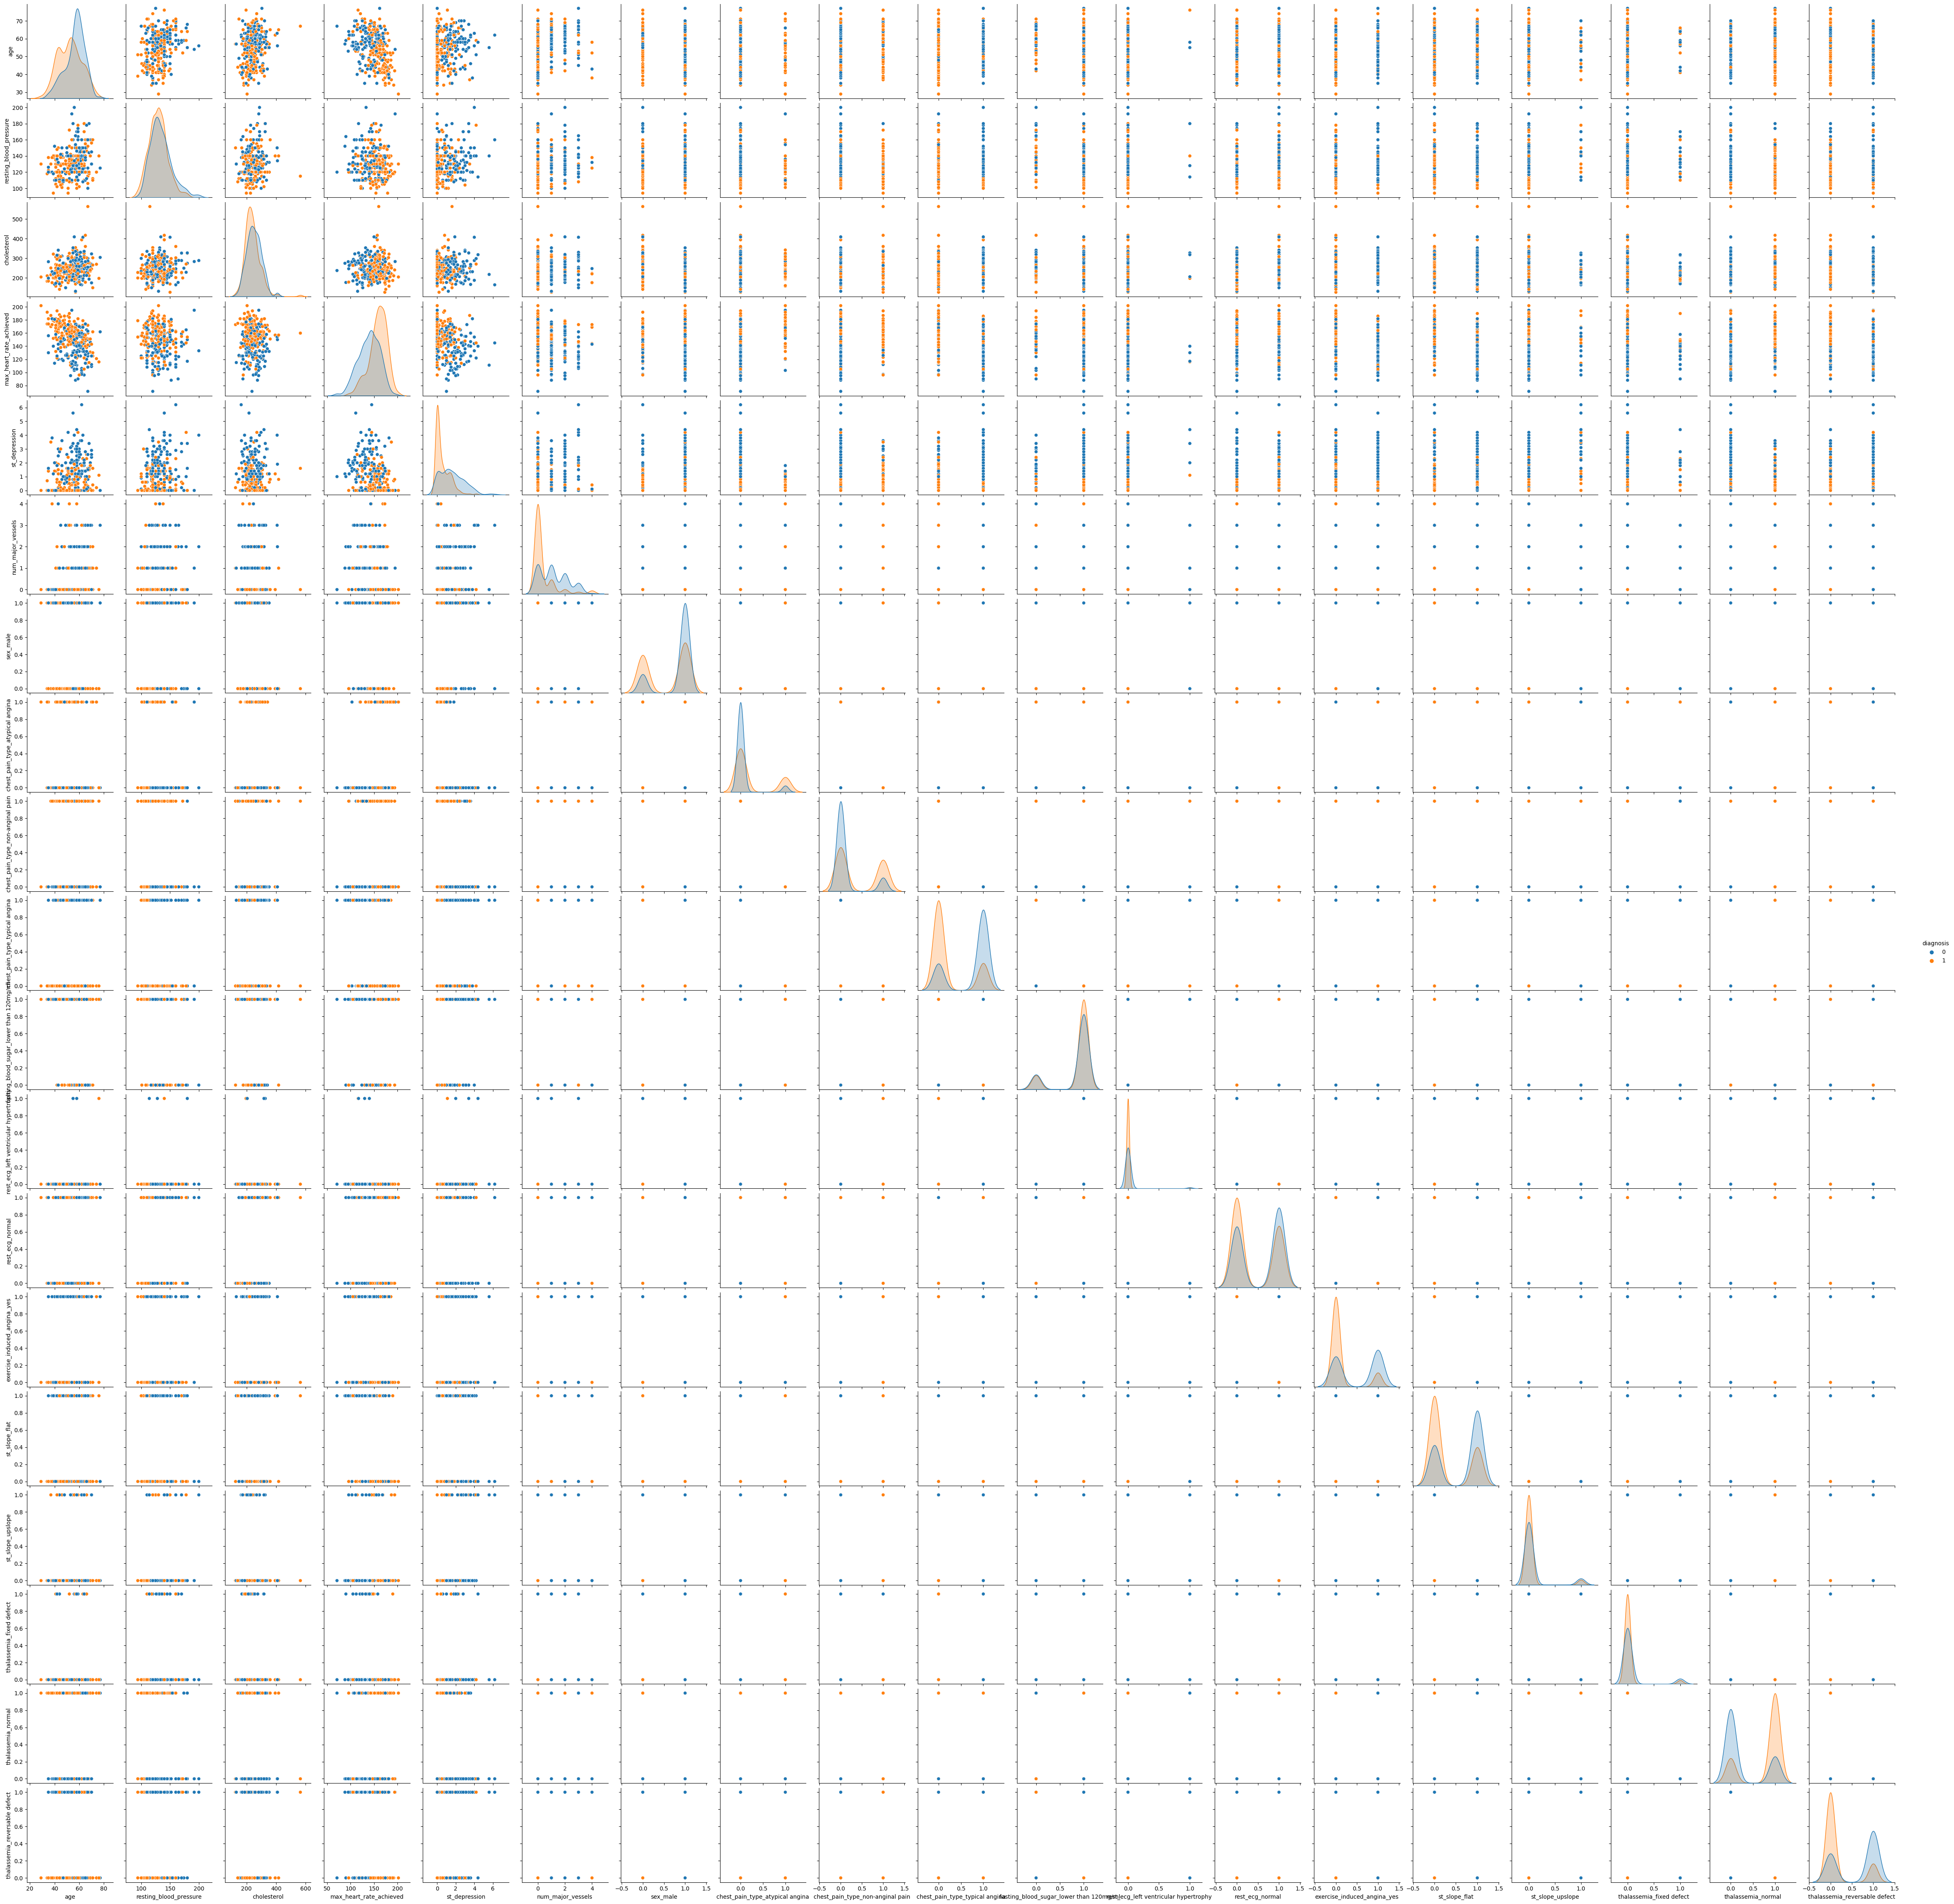

In [14]:
sns.pairplot(df, hue='diagnosis')

Perfect! Now we are ready to move forward.

<h2>Determining The Most Important Features</h2>
The report above gives us a variety of correlation plots that we can use to assess the features that have the best relationships to the target variable (diagnosis of heart disease). From those plots we can determine that the features that have the strongest correlations (i.e., relationships to our target variable are:

* cp
* thalach
* exang
* thal

We can also use feature_selection from sklearn to give us the chi squared statistic value. The null hypothesis for chi2 test is that two categorical variables are independent. Therefore, a higher value of the chi2 statistic means that two categorical variables are dependent and are thus more useful for classification. In other words, the highest chi squared values will represent the strongest relationships between our dependent variable (the diagnosis) and our independent variable. 

In [15]:
data = df.copy()
X = data.iloc[:,0:19]  #independent variable columns
y = data.iloc[:,-1]    #dependent variable column 

#Apply SelectKBest to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','chi squared score']  #naming the resulting dataframe columns

print(featureScores.nlargest(19,'chi squared score'))  #print 10 best features

                                 Attributes  chi squared score
3                   max_heart_rate_achieved         650.008493
4                             st_depression         253.653461
5                         num_major_vessels         210.625919
9            chest_pain_type_typical angina         142.563300
18            thalassemia_reversable defect         141.524151
13              exercise_induced_angina_yes         130.470927
17                       thalassemia_normal         129.833983
2                               cholesterol         110.723364
0                                       age          81.425368
8          chest_pain_type_non-anginal pain          75.643418
14                            st_slope_flat          66.295938
7           chest_pain_type_atypical angina          55.917533
1                    resting_blood_pressure          45.974069
6                                  sex_male          24.373650
12                          rest_ecg_normal          13

The results of our feature selection indicate that the max_heart_rate_achieved is the best feature to use. In general, the less features our model has, the easier the interpretation of the result. I'll choose the the top 3 features based on their chi squared score to use as my independent variables for now.

<h2>Building the Model</h2>

Let's start by defining our independent variables which we can do by keeping only the 3 features we'll be using as our independent variables based on the feature selection results we obtained above.   

In [16]:
cols_to_keep = ['max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
x = df[cols_to_keep]
x

max_heart_rate_achieved  st_depression  num_major_vessels
0                         168            1.0                  2
1                         155            3.1                  0
2                         125            2.6                  0
3                         161            0.0                  1
4                         106            1.9                  3
...                       ...            ...                ...
1020                      164            0.0                  0
1021                      141            2.8                  1
1022                      118            1.0                  1
1023                      159            0.0                  0
1024                      113            1.4                  1

[1025 rows x 3 columns]

And now our dependent variable is selected as such

In [17]:
y = df['diagnosis']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: diagnosis, Length: 1025, dtype: int64

Next, I'll start with an 80:20 split for our testing and training sets which I'll then normalize via min-max normalization. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

Now I'll write a little function to streamline the process of calculating, reporting and storing the accuracy store for each model. This function will report the accuracy score as well as the sensitivity and specificity for each model. Each of these quantitites will be neatly placed into a pandas dataframe for each classifier model we built. The dataframe for each model will then be concatenated into one dataframe for comparison between models. 

In [19]:
def model_assess(model, title = "Default"):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    cm = confusion_matrix(y_test, preds)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    
    specificity = cm[1,1]/(cm[1,1]+cm[0,1])
    
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    score = round(accuracy_score(y_test, preds), 5);
    
    rf_results = pd.DataFrame([title,score,sensitivity,specificity]).transpose()
    rf_results.columns = ['Method','Training Score', 'Sensitivity', 'Specificity']
    #print(classification_report(y_test,preds))
    return score, rf_results

Let's run the 10 different models and see what happens!

In [21]:
#1. Linear Perceptron Classifier
lp = Perceptron()
score, lp_df = model_assess(lp, "Linear Perceptron Classifier")

#2. Gaussian Naive Bayes
nb = GaussianNB()
score,nb_df = model_assess(nb, "Gaussian Naive Bayes")

#3. Random Forest Classfier
rf = RandomForestClassifier(n_estimators = 20, random_state = 12, max_depth = 5)
score,rf_df = model_assess(rf, "Random Forest Classfier")

#4. Extreme Gradient Boost
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6,
                    subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)
score,xgb_df = model_assess(xgb, "Extreme Gradient Boost")

#5. K-NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
score,knn_df = model_assess(knn, "K-NeighborsClassifier")

#6. Decision Tree Classifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6)
score,dt_df = model_assess(dt, "Decision Tree Classifier")

#7. Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
score,gbc_df = model_assess(gbc, "Gradient Boosting Classifier")

#8. Gaussian Process Classifier
gp = GaussianProcessClassifier()
score,gp_df = model_assess(gp, "Gaussian Process Classifier")

#9. Support Vector Classifier
svc = SVC()
score,svc_df = model_assess(svc, "Support Vector Classifier")

#10. MLP Classifier
mlp = MLPClassifier(max_iter = 1000, learning_rate_init=0.001, solver='adam')
score,mlp_df = model_assess(mlp, "MLP Classifier")

#Compile result dataframes for each model
score_df_list = [lp_df, nb_df, rf_df, xgb_df, knn_df, dt_df, gbc_df, gp_df, svc_df, mlp_df]
score_df_results = pd.concat(score_df_list, 
                        ignore_index=True).sort_values('Training Score',axis = 0, ascending = False)

score_df_results

Method Training Score Sensitivity Specificity
6  Gradient Boosting Classifier        0.83415    0.833333    0.834951
5      Decision Tree Classifier        0.80976    0.778761    0.847826
2       Random Forest Classfier        0.78537    0.829545    0.752137
3        Extreme Gradient Boost         0.7561    0.776596    0.738739
9                MLP Classifier        0.74146    0.769231    0.719298
4         K-NeighborsClassifier        0.73659    0.714286    0.763441
8     Support Vector Classifier        0.73659    0.722222    0.752577
7   Gaussian Process Classifier        0.72195    0.752809    0.698276
1          Gaussian Naive Bayes        0.65366    0.682353    0.633333
0  Linear Perceptron Classifier        0.57561         1.0    0.542105

Hmm, the Gradient Boosting Classifier performed the best with a 0.83 accuracy score. Can I get improved performance via a different dataset split? Let me try a 70:30 split and then we'll see if the models improve.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [24]:
lp = Perceptron()
score, lp_df = model_assess(lp, "Linear Perceptron Classifier")

nb = GaussianNB()
score,nb_df = model_assess(nb, "Gaussian Naive Bayes")

rf = RandomForestClassifier(n_estimators = 20, random_state = 12, max_depth = 5)
score,rf_df = model_assess(rf, "Random Forest Classfier")

xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6,
                    subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)
score,xgb_df = model_assess(xgb, "Extreme Gradient Boost")

knn = KNeighborsClassifier(n_neighbors=10)
score,knn_df = model_assess(knn, "K-NeighborsClassifier")

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6)
score,dt_df = model_assess(dt, "Decision Tree Classifier")

gbc = GradientBoostingClassifier()
score,gbc_df = model_assess(gbc, "Gradient Boosting Classifier")

gp = GaussianProcessClassifier()
score,gp_df = model_assess(gp, "Gaussian Process Classifier")

svc = SVC()
score,svc_df = model_assess(svc, "Support Vector Classifier")

mlp = MLPClassifier(max_iter = 1000, learning_rate_init=0.001, solver='adam')
score,mlp_df = model_assess(mlp, "MLP Classifier")

score_df_list = [lp_df, nb_df, rf_df, xgb_df, knn_df, dt_df, gbc_df, gp_df, svc_df, mlp_df]
score_df_results = pd.concat(score_df_list, 
                        ignore_index=True).sort_values('Training Score',axis = 0, ascending = False)

score_df_results

Method Training Score Sensitivity Specificity
6  Gradient Boosting Classifier         0.8539    0.860759    0.846667
5      Decision Tree Classifier        0.82792     0.82716    0.828767
2       Random Forest Classfier        0.82143    0.837662    0.805195
3        Extreme Gradient Boost        0.77922    0.837037    0.734104
4         K-NeighborsClassifier        0.77273    0.776398    0.768707
8     Support Vector Classifier        0.76299    0.762195    0.763889
9                MLP Classifier        0.76299    0.802817    0.728916
7   Gaussian Process Classifier           0.75    0.797101    0.711765
0  Linear Perceptron Classifier        0.70779    0.948052    0.627706
1          Gaussian Naive Bayes        0.69156    0.746154    0.651685

That split improved the models. I wonder if extending the number of independent variable would aid us? I'll include the top 5 features instead of just the top 3 as I did before.

In [25]:
cols_to_keep = ['max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
                'chest_pain_type_typical angina','thalassemia_reversable defect']
x = df[cols_to_keep]
x

max_heart_rate_achieved  st_depression  num_major_vessels  \
0                         168            1.0                  2   
1                         155            3.1                  0   
2                         125            2.6                  0   
3                         161            0.0                  1   
4                         106            1.9                  3   
...                       ...            ...                ...   
1020                      164            0.0                  0   
1021                      141            2.8                  1   
1022                      118            1.0                  1   
1023                      159            0.0                  0   
1024                      113            1.4                  1   

      chest_pain_type_typical angina  thalassemia_reversable defect  
0                                  1                              1  
1                                  1                              1  
2                                  1                              1  
3                                  1                              1  
4                                  1                              0  
...                              ...                            ...  
1020                               0                              0  
1021                               1                              1  
1022                               1                              0  
1023                               1                              0  
1024                               1                              1  

[1025 rows x 5 columns]

In [26]:
y = df['diagnosis']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: diagnosis, Length: 1025, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [29]:
lp = Perceptron()
score, lp_df = model_assess(lp, "Linear Perceptron Classifier")

nb = GaussianNB()
score,nb_df = model_assess(nb, "Gaussian Naive Bayes")

rf = RandomForestClassifier(n_estimators = 20, random_state = 12, max_depth = 5)
score,rf_df = model_assess(rf, "Random Forest Classfier")

xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6,
                    subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)
score,xgb_df = model_assess(xgb, "Extreme Gradient Boost")

knn = KNeighborsClassifier(n_neighbors=10)
score,knn_df = model_assess(knn, "K-NeighborsClassifier")

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6)
score,dt_df = model_assess(dt, "Decision Tree Classifier")

gbc = GradientBoostingClassifier()
score,gbc_df = model_assess(gbc, "Gradient Boosting Classifier")

gp = GaussianProcessClassifier()
score,gp_df = model_assess(gp, "Gaussian Process Classifier")

svc = SVC()
score,svc_df = model_assess(svc, "Support Vector Classifier")

mlp = MLPClassifier(max_iter = 1000, learning_rate_init=0.001, solver='adam')
score,mlp_df = model_assess(mlp, "MLP Classifier")

score_df_list = [lp_df, nb_df, rf_df, xgb_df, knn_df, dt_df, gbc_df, gp_df, svc_df, mlp_df]
score_df_results = pd.concat(score_df_list, 
                        ignore_index=True).sort_values('Training Score',axis = 0, ascending = False)

score_df_results

Method Training Score Sensitivity Specificity
6  Gradient Boosting Classifier        0.86688     0.90411    0.833333
2       Random Forest Classfier         0.8539    0.913043    0.805882
5      Decision Tree Classifier         0.8539    0.919118    0.802326
7   Gaussian Process Classifier        0.81818    0.887218    0.765714
3        Extreme Gradient Boost        0.81494    0.892308    0.758427
8     Support Vector Classifier        0.81494    0.892308    0.758427
1          Gaussian Naive Bayes        0.81169    0.858156    0.772455
4         K-NeighborsClassifier        0.79545    0.833333    0.762195
0  Linear Perceptron Classifier        0.79221    0.913043    0.720207
9                MLP Classifier        0.79221    0.836879    0.754491

Using the top 5 features improved the accuracy of the models. Out of curiosity, let's see what happens if I use all the attributes we have at our disposal for our model.

In [30]:
y = df['diagnosis']
x = df.drop(['diagnosis'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

lp = Perceptron()
score, lp_df = model_assess(lp, "Linear Perceptron Classifier")

nb = GaussianNB()
score,nb_df = model_assess(nb, "Gaussian Naive Bayes")

rf = RandomForestClassifier(n_estimators = 20, random_state = 12, max_depth = 5)
score,rf_df = model_assess(rf, "Random Forest Classfier")

xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6,
                    subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)

score,xgb_df = model_assess(xgb, "Extreme Gradient Boost")

knn = KNeighborsClassifier(n_neighbors=10)
score,knn_df = model_assess(knn, "K-NeighborsClassifier")

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6)
score,dt_df = model_assess(dt, "Decision Tree Classifier")

gbc = GradientBoostingClassifier()
score,gbc_df = model_assess(gbc, "Gradient Boosting Classifier")

gp = GaussianProcessClassifier()
score,gp_df = model_assess(gp, "Gaussian Process Classifier")

svc = SVC()
score,svc_df = model_assess(svc, "Support Vector Classifier")

mlp = MLPClassifier(max_iter = 2000, learning_rate_init = 0.0001, solver='adam')
score,mlp_df = model_assess(mlp, "MLP Classifier")

score_df_list = [lp_df, nb_df, rf_df, xgb_df, knn_df, dt_df, gbc_df, gp_df, svc_df, mlp_df]
score_df_results = pd.concat(score_df_list, 
                        ignore_index=True).sort_values('Training Score',axis = 0, ascending = False)

score_df_results

Method Training Score Sensitivity Specificity
6  Gradient Boosting Classifier        0.89935    0.970588    0.843023
2       Random Forest Classfier        0.88636    0.962687    0.827586
5      Decision Tree Classifier        0.87013     0.96124    0.804469
8     Support Vector Classifier        0.86364    0.892617    0.836478
7   Gaussian Process Classifier        0.85714    0.885906    0.830189
9                MLP Classifier         0.8474    0.911765    0.796512
4         K-NeighborsClassifier        0.84091    0.866667    0.816456
3        Extreme Gradient Boost        0.83442       0.875     0.79878
1          Gaussian Naive Bayes        0.81169    0.868613    0.766082
0  Linear Perceptron Classifier        0.79221    0.841727    0.751479

The Gradient Boosting Classifier still produces the best results for all metrics (i.e., training score, sensitivity and specificity). It's clossely followed by the Random Forest and Decision Tree Classifiers. Let's focus on the GBC for a bit.

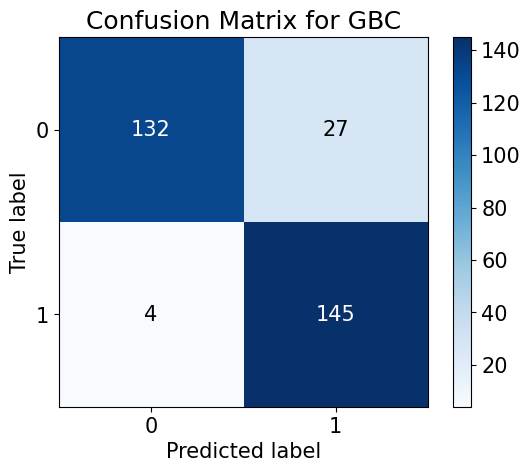

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_gbc_train_pred = gbc.predict(X_train) #Predicted y values using training set
y_gbc_test_pred  = gbc.predict(X_test) #Predicted y values using test set

plt.rcParams.update({'font.size': 15})
skplt.metrics.plot_confusion_matrix(y_test, y_gbc_test_pred,
                                    normalize=False, title = 'Confusion Matrix for GBC')
plt.show()

The confusion matrix shows that 4 instances are clasified incorrectly as benign (False negatives). Also, 27 benign cases have been classified as malignant (False positives). Can we improve this further? Let's try a grid search exploration.

In [ ]:
y = df['diagnosis']
x = df.drop(['diagnosis'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

gbc = GradientBoostingClassifier()

grid_values = {
               'learning_rate':[10,5,1,0.5,0.1,0.05,0.01,0.007,0.005,0.003,0.001],
               'n_estimators':[10,50,100,150,200,250,300,350,400,450,500],
               'max_depth': [1,2,3,4,5,6,7,8,9,10,11]
              }

grid_clf_acc = GridSearchCV(gbc, 
                            param_grid = grid_values, 
                            cv=5,
                            scoring = 'recall', 
                            return_train_score=True,
                            verbose = 2,
                            n_jobs = 4)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Fitting 5 folds for each of 1331 candidates, totalling 6655 fits


Cool! The accuracy score increased significantly after doing our grid search! Let's see the confusion matrix 

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_acc,
                                    normalize=False, title = 'Confusion Matrix for GBC')

The confusion matrix now shows that 6 instances are clasified incorrectly as benign (False negatives) which is 2 more than what we had before. Also, 13 benign cases have been classified as malignant (False positives) which is 14 less than before. That's quite the improvement! Below are the parameters of the optimized model.

In [ ]:
params = gbc.get_params()
params

In [37]:
fin_params = grid_clf_acc.best_params_
fin_params

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}

<h2>ROC-AUC Curves of Model</h2>
Let's now look at the Receiver operating characteristic curve (ROC curve) and the area under the curve (AUC) for this model. ROC is a probability curve and AUC represents the degree or measure of separability. The Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

In [ ]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_acc)
print("The AUC is ",auc(fpr, tpr))
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.show()

Awesome! Our model has a high degree of separability which is desired.

I'll rerun the fit using the optimized parameters from the grid search in order to instantiate the model for subsequent analysis. (For some reason the model wasn't being recognized...)

In [ ]:
y = df['diagnosis']
x = df.drop(['diagnosis'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Normalize independent variable data for both sets
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test  = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

gbc = GradientBoostingClassifier(ccp_alpha = 0.0,
                                 criterion = 'friedman_mse',
                                 init = None,
                                 learning_rate= 0.1,
                                 loss= 'deviance',
                                 max_depth= 3,
                                 max_features= None,
                                 max_leaf_nodes= None,
                                 min_impurity_decrease= 0.0,
                                 min_samples_leaf= 1,
                                 min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0,
                                 n_estimators= 100,
                                 n_iter_no_change= None,
                                 random_state= None,
                                 subsample= 1.0,
                                 tol = 0.0001,
                                 validation_fraction = 0.1,
                                 verbose = 0,
                                 warm_start = False)
gbc.fit(X_train, y_train)

y_gbc_train_pred = gbc.predict(X_train) #Predicted y values using training set
y_gbc_test_pred  = gbc.predict(X_test) #Predicted y values using test set

 <h2>What do we make of this?</h2>
Let's use the eli5 package to help us make better sense of our model.

In [ ]:
perm = PermutationImportance(gbc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The report shows that num_major_vessels,  chest_pain_type_typical angina , st_depression,  age and  thalassemia_normal  are the top 5 features that contribute the most to modeling the target variable. I'll look into the Partial Dependence Plots for these five variables to see what we can learn. 

<h2>Partial Dependence Plots - Feature Effects On Model Prediction</h2>
In PDPs, a single variable is varied in a single row across a range of values in order to see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list,

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('diagnosis')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=gbc, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The PDP shows that as the number of major blood vessels increases, the probability of heart disease decreases. That makes sense since more available vessels means that more blood can get to the heart. 

Next, let's look at the PDP for chest_pain_type_typical angina.

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('diagnosis')

feat_name = 'chest_pain_type_typical angina'
pdp_dist = pdp.pdp_isolate(model=gbc, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Angina is a type of chest pain caused by reduced blood flow to the heart. There's different types of angina (stable , unstable, variant and refractory). Typical angina is common and is generally experienced during periods of physical exertion and usually goes away before long. The PDP for typical angina shows that when a patient exhibits this condition the likelihood of them having heart disease goes down which makes sense.

Next, I'll look into the st_depression PDP

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('diagnosis')

feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=gbc, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The st_depression also shows a general reduction in probability the higher it goes. This variable is related to the shape and direction of the electrocardiagram (ECG). More specifically, it's related to the ST segment in an ECG which is associated with the electrical activity of the heart after the right and left ventricles have contracted. Depending on the shape and direction of the ST segment, one can determine if there is a change in the blood flow to the heart which can be due to a heart attack, pericarditis, myocarditis, or a more severe type of angina mongst others.

Since the ST depression value described here corresponds to the signal induced after exercise relative to rest, then perhaps there is a way to increase our understanding of this  variable via its interaction with another of the parameters in our attribute list. The <code>st_slope</code> values could be potentially useful so I'll generate a 2D PDP between them and the ST depression.

In [ ]:
#Get interaction between st_depression and st_upslope
inter1  =  pdp.pdp_interact(model=gbc, dataset=X_test, model_features=base_features,
                            features=['st_slope_upslope', 'st_depression'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['st_slope_upslope', 'st_depression'],
                      plot_type='contour',figsize=(10,10),
                      plot_params = {'contour_color':  'black',
                                     'cmap': 'coolwarm',})
plt.show()

The color scale represents the probability of getting a diagnosis of no heart disease. The "hotter" the color the higher the probability. The probability for a positive diagnosis of heart disease is highest when the ST depression is low. 

In [ ]:
#Get interaction between st_depression and st_flat
inter1  =  pdp.pdp_interact(model=gbc, dataset=X_test, model_features=base_features,
                            features=['st_slope_flat', 'st_depression'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['st_slope_flat', 'st_depression'],
                      plot_type='contour',figsize=(10,10), 
                      plot_params = {'contour_color':  'black',
                                     'cmap': 'coolwarm',})
plt.show()

The same thing can be seen when looking at the interaction between the ST depression and the flat_slope values. The probability for a positive diagnosis of heart disease is highest when the ST depression is low.

Let's now look at, the PDP for age below

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('diagnosis')

feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=gbc, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The PDP for age shows that the probability of a diagnosis of heart disease increases with age which makes sense.

Finally, let's look at the PDP for thallassemia_normal

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('diagnosis')

feat_name = 'thalassemia_normal'
pdp_dist = pdp.pdp_isolate(model=gbc, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Hmm, the model suggests that the probability of a diagnosis of heart disease increases when thalassemia has a normal value... Strange...

<h2>SHAP Values for Assesment of Contributions of Model Features</h2>
Let's look at the Shapley Additive Explanations (SHAP). SHAP is a method from game theory that can help explain the outputs from a machine learning model. More specifically, these SHAP values allow us to understand the impact from each feature in our model by breaking down the predictions made by the model. It's important to note that SHAP values are not a model assessment criteria. In other words they don't evaluate the quality of the model. They are here to help us understand the importance/contribution of each feature in our model.

Let's plot them and see what happens

In [ ]:
explainer = shap.Explainer(gbc)

shap_values = explainer.shap_values(X_test)

#Include the SHAP values for each feature in the plot
feature_names = [a + ": " + str(b) for a,b 
                 in zip(X_test.columns, np.abs(shap_values).mean(0).round(2))]

shap.summary_plot(shap_values, X_test, plot_type="bar")

The plot above shows the absolute SHAP value which tells us how much a single feature affected the prediction.The number of major vessels, typical angina chest pain and normal thalassemia were the top 3 factors for this observation.

Let's plot the bee swarm plot to get the feature importance over the entire dataset. 

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=feature_names)

From this plot, red values indicate a positive contribution (i.e., heart disease) while blue values indicate a negative contribution (i.e., no heart disease)  to the prediction. From here we can see the following:  

* A high positive contribution is obtained for number of major vessels when the values are low. 
* A high positive contribution is obtained for typical angina when the values are low. 
* A high positive contribution is obtained for normal thalassemia when the values are high. 

This allows us to get the local importance of each contribution. I've also plotted a violin plot of the data distributions below.

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='violin',feature_names=feature_names)

Now I can use force plots with the SHAP values to determine how the different attributes are contributing to their predicted diagnosis.

In [ ]:
def HD_risk_factors_SHAP(model, patient):

    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value,
                           shap_values,
                           patient,
                           link = 'logit')

In [ ]:
data_for_prediction = X_test.iloc[0,:].astype(float)
HD_risk_factors_SHAP(gbc, data_for_prediction)

For this person the base probability for a diagnosis of heart disease is 53.14% and their prediction using the GBC model is 91%. This is due to them not having any major vessels show up from their fluoroscopy results, having normal thalassemia, and an upsloping ST segment. Therefore, this patient would  be expected to have heart disease.

Let's look at another patient

In [ ]:
data_for_prediction = X_test.iloc[300,:].astype(float)
HD_risk_factors_SHAP(gbc, data_for_prediction)

For this patient the base probability for a diagnosis of heart disease is 53.14% and their prediction using the GBC model is 18%. This is due to them having a major vessels show up from their fluoroscopy results, having normal thalassemia, and no typical angina chest pain. Therefore, this patient would  be expected to not have heart disease.

We can generate SHAP dependence contribution plots in order to assess the relationship between a feature's values and the model's predicted outcomes.

Below I'll plot the SHAP dependence plots for each of the top 4 features. I'll also plot each of these features using some of the other model attributes to get a feel of the effect that the interaction effects have on the vertical dispersion of the SHAP values. Let's start by looking at the number of major vessels feature.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

shap.dependence_plot('num_major_vessels', shap_values,
                     X_test, interaction_index="chest_pain_type_typical angina",
                     ax=axes[0, 0], show=False)
shap.dependence_plot('num_major_vessels', shap_values,
                     X_test, interaction_index="thalassemia_normal",
                     ax=axes[0, 1], show=False)
shap.dependence_plot('num_major_vessels', shap_values,
                     X_test, interaction_index="st_depression",
                     ax=axes[1, 0], show=False)
shap.dependence_plot('num_major_vessels', shap_values,
                     X_test, interaction_index="cholesterol",
                     ax=axes[1, 1], show=False)
plt.show()

The SHAP dependence plots for num_major_vessels show that SHAP value is positive when the there are no major vessels showing up in the fluoroscopy results. Otherwise, the SHAP value is negative. This means that having no vessels show up in fluoroscopy would be a strong indicator of heart disease. 

Next, let's look at the typical angina dependence plots below. 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

shap.dependence_plot('chest_pain_type_typical angina', shap_values,
                     X_test, interaction_index="num_major_vessels",
                     ax=axes[0, 0], show=False)
shap.dependence_plot('chest_pain_type_typical angina', shap_values,
                     X_test, interaction_index="thalassemia_normal",
                     ax=axes[0, 1], show=False)
shap.dependence_plot('chest_pain_type_typical angina', shap_values,
                     X_test, interaction_index="st_depression",
                     ax=axes[1, 0], show=False)
shap.dependence_plot('chest_pain_type_typical angina', shap_values,
                     X_test, interaction_index="cholesterol",
                     ax=axes[1, 1], show=False)
plt.show()

Another noted difference between the SHAP values here. These plots suggest that not having a typical angina chest pain would be indicative of heart disease. This makes sense since there are more severe angina categories present in the model.

Next, let's look at the thalassemia_normal dependence plots.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

shap.dependence_plot('thalassemia_normal', shap_values,
                     X_test, interaction_index="num_major_vessels",
                     ax=axes[0, 0], show=False)
shap.dependence_plot('thalassemia_normal', shap_values,
                     X_test, interaction_index="chest_pain_type_typical angina",
                     ax=axes[0, 1], show=False)
shap.dependence_plot('thalassemia_normal', shap_values,
                     X_test, interaction_index="st_depression",
                     ax=axes[1, 0], show=False)
shap.dependence_plot('thalassemia_normal', shap_values,
                     X_test, interaction_index="cholesterol",
                     ax=axes[1, 1], show=False)
plt.show()

Interesting, having normal thalassemia seems to be contributing towards a heart disease diagnosis.

Next, the ST depression dependence plots.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

shap.dependence_plot('st_depression', shap_values,
                     X_test, interaction_index="num_major_vessels",
                     ax=axes[0, 0], show=False)
shap.dependence_plot('st_depression', shap_values,
                     X_test, interaction_index="chest_pain_type_typical angina",
                     ax=axes[0, 1], show=False)
shap.dependence_plot('st_depression', shap_values,
                     X_test, interaction_index="thalassemia_normal",
                     ax=axes[1, 0], show=False)
shap.dependence_plot('st_depression', shap_values,
                     X_test, interaction_index="cholesterol",
                     ax=axes[1, 1], show=False)
plt.show()

The bottom axis shows from left to right the trend of the ST segment going from a downslope to flat to an upslope. The SHAP values appear to be trending downwards when going from a downslope towards an upslope. This suggests that having an ST segment has a an upward slope would be indicative of heart disease.

<h2>Final Model Interpretation</h2>
Some things we can takeaway from the model are as follows:

* The more major vessels the lower the risk of heart disease
* Having typical angina lowers the risk of heart disease
* Having a 'normal' thalassemia result increases risk of heart disease
* Risk of heart disease increases with age

The model results can be visualized via the force plot below for all 308 patients in our test set. The x-axis represents the patient ID while the y-axis represents the SHAP value. Each trace corresponds to one of the model parameters. Red regions correspond to a prediction of a heart disease diagnosis while blue regions correspond to regions of no heart disease diagnosis. Therefore, patients with large blue swaths in their parameter space would not be expected to have heart disease while patients with primarily red swaths would be expected to have/develop heart disease. 

The plot below is interactive so play around with the different ways to visualize the results of the model :]

In [ ]:
shap_values = explainer.shap_values(X_train.iloc[:307])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:307],link='logit')

<h2>Conclusions</h2>
The results from this model appear to be in accord with some of the factors known to cause heart disease. The accuracy score of the model  is 93.8% and it exhibited a high degree of separability. This exercise shows how machine learning classifier models can be used to predict the outcome of a categorical variable (i.e., heart disease is present or not). I would like to add that the dataset shown here is over 30 years old and much more research has been done in the medical field on the effects that things like the effect that race and other demographic factors have on heart disease. Therefore, I'd be interested in the future to look into more recent data for this and other diseases. 